### Import Libraries

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 56 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load Dataset

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/dataset/training_dataset.csv")
print(len(data))
display(data.head())

536138


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Label
0,58:50.7,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
1,58:50.3,24,7,0,10,8,2.054029,6,6,7,3.166667,4,224,11,1,1
2,58:49.9,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
3,58:49.5,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,1
4,58:49.1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536138 entries, 0 to 536137
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         536138 non-null  object 
 1   FQDN_count        536138 non-null  int64  
 2   subdomain_length  536138 non-null  int64  
 3   upper             536138 non-null  int64  
 4   lower             536138 non-null  int64  
 5   numeric           536138 non-null  int64  
 6   entropy           536138 non-null  float64
 7   special           536138 non-null  int64  
 8   labels            536138 non-null  int64  
 9   labels_max        536138 non-null  int64  
 10  labels_average    536138 non-null  float64
 11  longest_word      536124 non-null  object 
 12  sld               536138 non-null  object 
 13  len               536138 non-null  int64  
 14  subdomain         536138 non-null  int64  
 15  Label             536138 non-null  int64  
dtypes: float64(2), int64

In [ ]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Label
count,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000,536138.000000
mean,22.345262,6.100633,0.849604,10.412959,6.539344,2.485026,4.543355,4.806201,8.240375,4.794970,12.587228,0.757902,0.549025
std,5.968281,3.883699,4.951571,3.226364,4.482443,0.407780,2.193396,1.796751,4.408849,4.579084,4.173231,0.428354,0.497591
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,1.500000,2.000000,0.000000,0.000000
25%,19.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,11.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,29.000000,32.000000,34.000000,12.000000,4.368167,8.000000,7.000000,32.000000,32.000000,35.000000,1.000000,1.000000


### Preprocesing

In [ ]:
data = data.drop(['timestamp', 'longest_word', 'sld'], axis=1)

In [ ]:
print(data.all().isna().sum())

0


In [ ]:
data.Label.value_counts()

1    294353
0    241785
Name: Label, dtype: int64

Text(0, 0.5, 'Count')

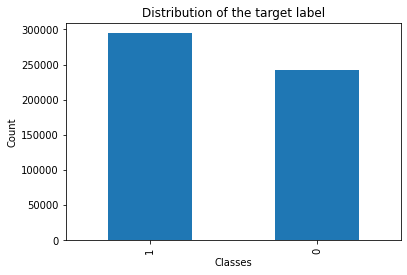

In [ ]:
data.Label.value_counts().plot(kind='bar');
plt.title('Distribution of the target label')
plt.xlabel('Classes')
plt.ylabel('Count')

In [ ]:
X = data.drop(columns=['Label']).values
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=0)

### Modeling

Test Accuracy = 0.8223038758533219
              precision    recall  f1-score   support

           0       1.00      0.61      0.76     48435
           1       0.76      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.88      0.80      0.81    107228
weighted avg       0.87      0.82      0.81    107228



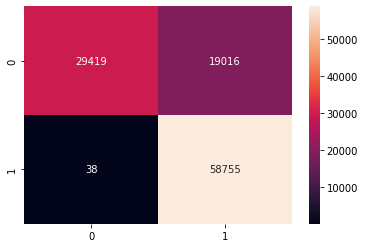

In [ ]:
train_dataset = Pool(X_train, y_train, feature_names=list(data.drop(columns=['Label']).columns))

model_params = {
    'iterations': 1000, 
    'loss_function': 'Logloss',
    'depth': 4,
    'learning_rate': 0.02,
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model2 = CatBoostClassifier(**model_params)
model2.fit(train_dataset, verbose=False, plot=False)

y_pred = model2.predict(X_test)
print("Test Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

Test Accuracy = 0.8217070168239639
              precision    recall  f1-score   support

           0       1.00      0.61      0.75     48435
           1       0.76      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.88      0.80      0.81    107228
weighted avg       0.86      0.82      0.81    107228



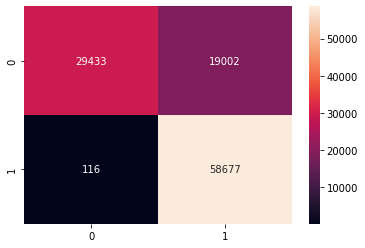

In [ ]:
model3 = RandomForestClassifier(n_estimators=1000, max_depth=4)

model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print("Test Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

Test Accuracy = 0.8202148692505689
              precision    recall  f1-score   support

           0       0.99      0.61      0.75     48435
           1       0.75      1.00      0.86     58793

    accuracy                           0.82    107228
   macro avg       0.87      0.80      0.81    107228
weighted avg       0.86      0.82      0.81    107228



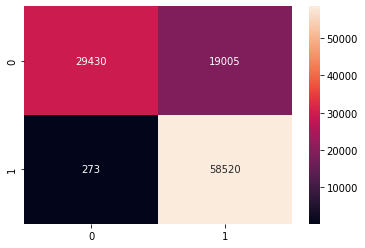

In [ ]:
model4 = LogisticRegression()

model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
print("Test Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

### Svae the best model

In [ ]:
import pickle
with open(r'model.pkl','wb') as model_pkl:
  pickle.dump(model2, model_pkl, protocol=2)